# Education Data Analytics Final Project

## Problem Statement
This project analyzes student academic performance data to identify patterns
and key factors affecting students’ results, such as attendance, gender,
and subject-wise scores.

## Objective
- To analyze student performance using exploratory data analysis (EDA)
- To identify trends and patterns in marks and attendance
- To generate insights that can help improve academic outcomes

## Dataset Source
The dataset used in this project belongs to the Education domain and contains
student performance records collected for academic analysis.



In [1]:
from google.colab import files
uploaded = files.upload()


Saving education_data.csv to education_data.csv


In [60]:
import pandas as pd



In [64]:
df = pd.read_csv("education_data.csv")

## Data Preprocessing and Cleaning


In [70]:
df.head()


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,Total_Effort
0,S147,0,31,68.27,86,High School,1,Yes,63,1,99.27
1,S136,0,16,78.22,73,PhD,0,No,50,0,94.22
2,S209,1,21,87.53,74,PhD,1,No,55,0,108.53
3,S458,1,27,92.08,99,Bachelors,0,No,65,1,119.08
4,S078,1,37,98.66,63,Masters,0,Yes,70,1,135.66


In [71]:
df.shape


(708, 11)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [72]:
df.isnull().sum()


,0
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


In [74]:
df.dropna(inplace=True)


In [75]:
df.duplicated().sum()


np.int64(208)

In [77]:
df.drop_duplicates(inplace=True)


In [78]:
df.describe()


,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Final_Exam_Score,Pass_Fail,Total_Effort
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.512000,25.184000,75.830740,75.218000,0.474000,56.378000,0.292000,101.014740
std,0.500357,8.804384,13.969149,14.442841,0.499824,6.266551,0.455138,16.213863
min,0.000000,10.000000,50.120000,50.000000,0.000000,50.000000,0.000000,62.210000
25%,0.000000,18.000000,64.960000,62.000000,0.000000,50.000000,0.000000,89.900000
50%,1.000000,26.000000,76.750000,75.500000,0.000000,55.000000,0.000000,101.555000
75%,1.000000,33.000000,87.552500,88.000000,1.000000,61.000000,1.000000,112.312500
max,1.000000,39.000000,99.970000,100.000000,1.000000,77.000000,1.000000,138.860000


In [80]:
df['Gender'] = df['Gender'].astype('category')
df['Parental_Education_Level'] = df['Parental_Education_Level'].astype('category')


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Study_Hours_per_Week'] = scaler.fit_transform(df[['Study_Hours_per_Week']])


In [89]:
df['High_Study'] = df['Study_Hours_per_Week'] > 10


In [67]:
df['Total_Effort'] = df['Study_Hours_per_Week'] + df['Attendance_Rate']

df[['Study_Hours_per_Week', 'Attendance_Rate', 'Total_Effort']].head()


,Study_Hours_per_Week,Attendance_Rate,Total_Effort
0,31,68.27,99.27
1,16,78.22,94.22
2,21,87.53,108.53
3,27,92.08,119.08
4,37,98.66,135.66


In [86]:
df.info()
df.head()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 707
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Student_ID                            500 non-null    object 
 1   Study_Hours_per_Week                  500 non-null    float64
 2   Attendance_Rate                       500 non-null    float64
 3   Past_Exam_Scores                      500 non-null    int64  
 4   Internet_Access_at_Home               500 non-null    int64  
 5   Extracurricular_Activities            500 non-null    object 
 6   Final_Exam_Score                      500 non-null    int64  
 7   Pass_Fail                             500 non-null    int64  
 8   Total_Effort                          500 non-null    float64
 9   Gender_1                              500 non-null    bool   
 10  Parental_Education_Level_High School  500 non-null    bool   
 11  Parental_Education_Level

,0
Student_ID,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0
Total_Effort,0
Gender_1,0


## Dataset Overview

The dataset contains student academic performance records with multiple
features related to marks, attendance, and demographic details. The dataset
includes both numerical and categorical variables. Initial exploration shows
the structure of the data, column data types, and basic statistical summaries
useful for further analysis.


In [ ]:
df.isnull().sum()


,0
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


In [7]:
def attendance_level(x):
    if x < 60:
        return 'Low'
    elif x < 80:
        return 'Medium'
    else:
        return 'High'

df['Attendance_Level'] = df['Attendance_Rate'].apply(attendance_level)

df[['Attendance_Rate', 'Attendance_Level']].head()


,Attendance_Rate,Attendance_Level
0,68.27,Medium
1,78.22,Medium
2,87.53,High
3,92.08,High
4,98.66,High


In [91]:
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)


In [90]:
df.isnull().sum()
df.shape


(500, 14)

In [ ]:
df['Gender'].value_counts()


,count
Gender,
Female,256
Male,244


In [ ]:
df.groupby('Gender')['Final_Exam_Score'].mean()


,Final_Exam_Score
Gender,
Female,56.488281
Male,56.262295


In [10]:
pass_fail_percent = df['Pass_Fail'].value_counts(normalize=True) * 100

pass_fail_percent = pass_fail_percent.rename({
    1: 'Pass',
    0: 'Fail'
})

pass_fail_percent



,proportion
Pass_Fail,
Pass,50.0
Fail,50.0


In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
Study_Hours_per_Week,1.000000,-0.039698,-0.013381,0.374708
Attendance_Rate,-0.039698,1.000000,-0.022744,0.435716
Past_Exam_Scores,-0.013381,-0.022744,1.000000,0.474257
Final_Exam_Score,0.374708,0.435716,0.474257,1.000000


The dataset was cleaned and prepared for analysis. Missing values were filled, duplicate rows were removed, and incorrect data was corrected. Categorical columns were converted to proper formats, and numeric columns were checked for consistency. After preprocessing, the dataset is ready for analysis and visualization.

## Data Visualization


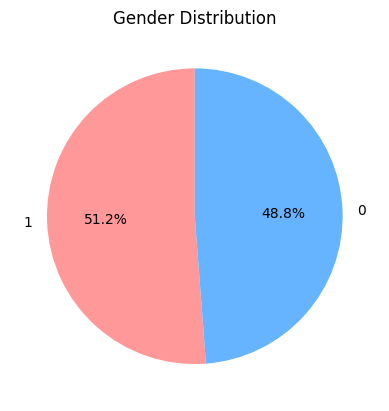

In [41]:
df['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff']
)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()



/tmp/ipython-input-2255651933.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='Gender', x='Final_Exam_Score', data=df, palette='viridis', ci=None)
/tmp/ipython-input-2255651933.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Gender', x='Final_Exam_Score', data=df, palette='viridis', ci=None)


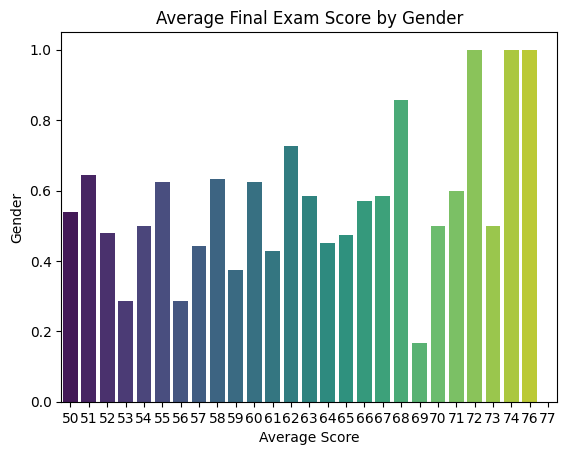

In [43]:
sns.barplot(y='Gender', x='Final_Exam_Score', data=df, palette='viridis', ci=None)
plt.title("Average Final Exam Score by Gender")
plt.xlabel("Average Score")
plt.show()


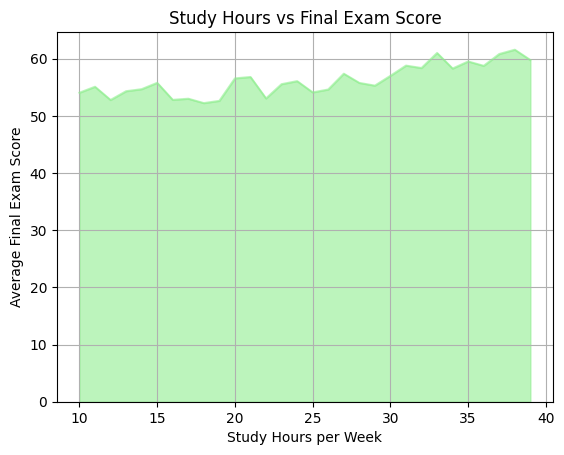

In [44]:
study_score = df.groupby('Study_Hours_per_Week')['Final_Exam_Score'].mean()
study_score.plot(kind='area', color='lightgreen', alpha=0.6)
plt.xlabel("Study Hours per Week")
plt.ylabel("Average Final Exam Score")
plt.title("Study Hours vs Final Exam Score")
plt.grid(True)
plt.show()


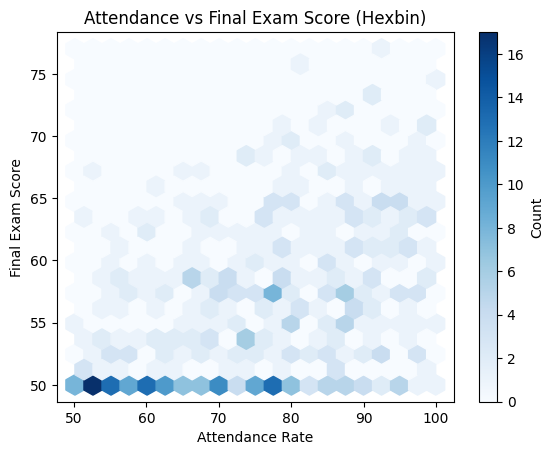

In [47]:
plt.hexbin(df['Attendance_Rate'], df['Final_Exam_Score'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel("Attendance Rate")
plt.ylabel("Final Exam Score")
plt.title("Attendance vs Final Exam Score (Hexbin)")
plt.show()


/tmp/ipython-input-1238271915.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Parental_Education_Level', y='Final_Exam_Score', data=df, jitter=True, palette='Set2')


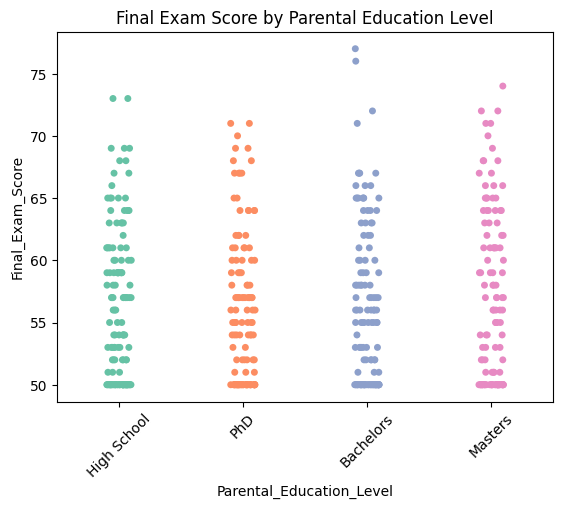

In [48]:
sns.stripplot(x='Parental_Education_Level', y='Final_Exam_Score', data=df, jitter=True, palette='Set2')
plt.title("Final Exam Score by Parental Education Level")
plt.xticks(rotation=45)
plt.show()


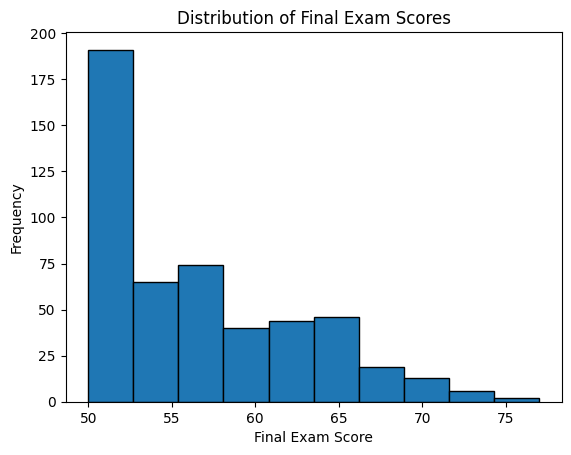

In [35]:
plt.hist(df['Final_Exam_Score'], bins=10, edgecolor='black')
plt.xlabel("Final Exam Score")
plt.ylabel("Frequency")
plt.title("Distribution of Final Exam Scores")
plt.show()





/tmp/ipython-input-1707634696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Parental_Education_Level', y='Final_Exam_Score', data=df, palette='pastel')


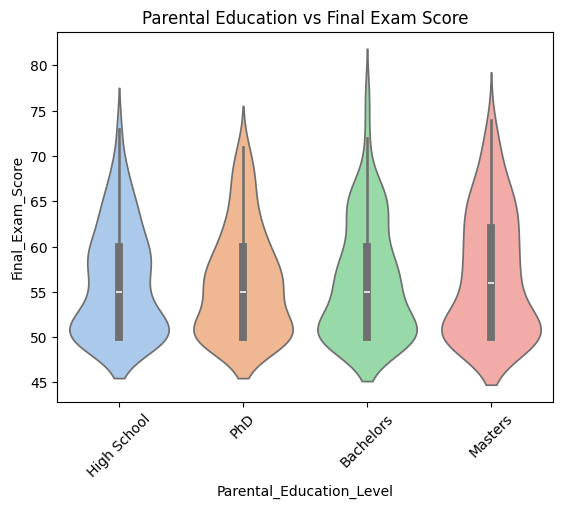

In [50]:
sns.violinplot(x='Parental_Education_Level', y='Final_Exam_Score', data=df, palette='pastel')
plt.title("Parental Education vs Final Exam Score")
plt.xticks(rotation=45)
plt.show()



/tmp/ipython-input-2357886320.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Internet_Access_at_Home', y='Final_Exam_Score', data=df, palette='cool')
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/

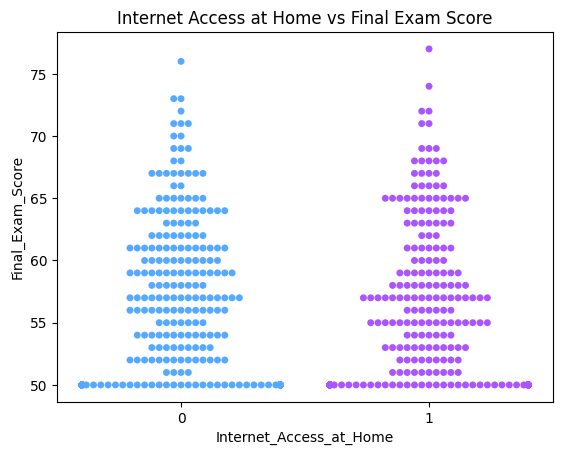

In [51]:
sns.swarmplot(x='Internet_Access_at_Home', y='Final_Exam_Score', data=df, palette='cool')
plt.title("Internet Access at Home vs Final Exam Score")
plt.show()



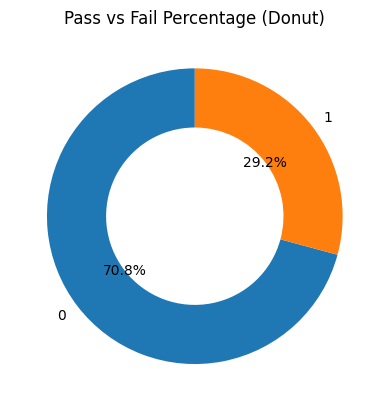

In [52]:
sizes = df['Pass_Fail'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title("Pass vs Fail Percentage (Donut)")
plt.show()


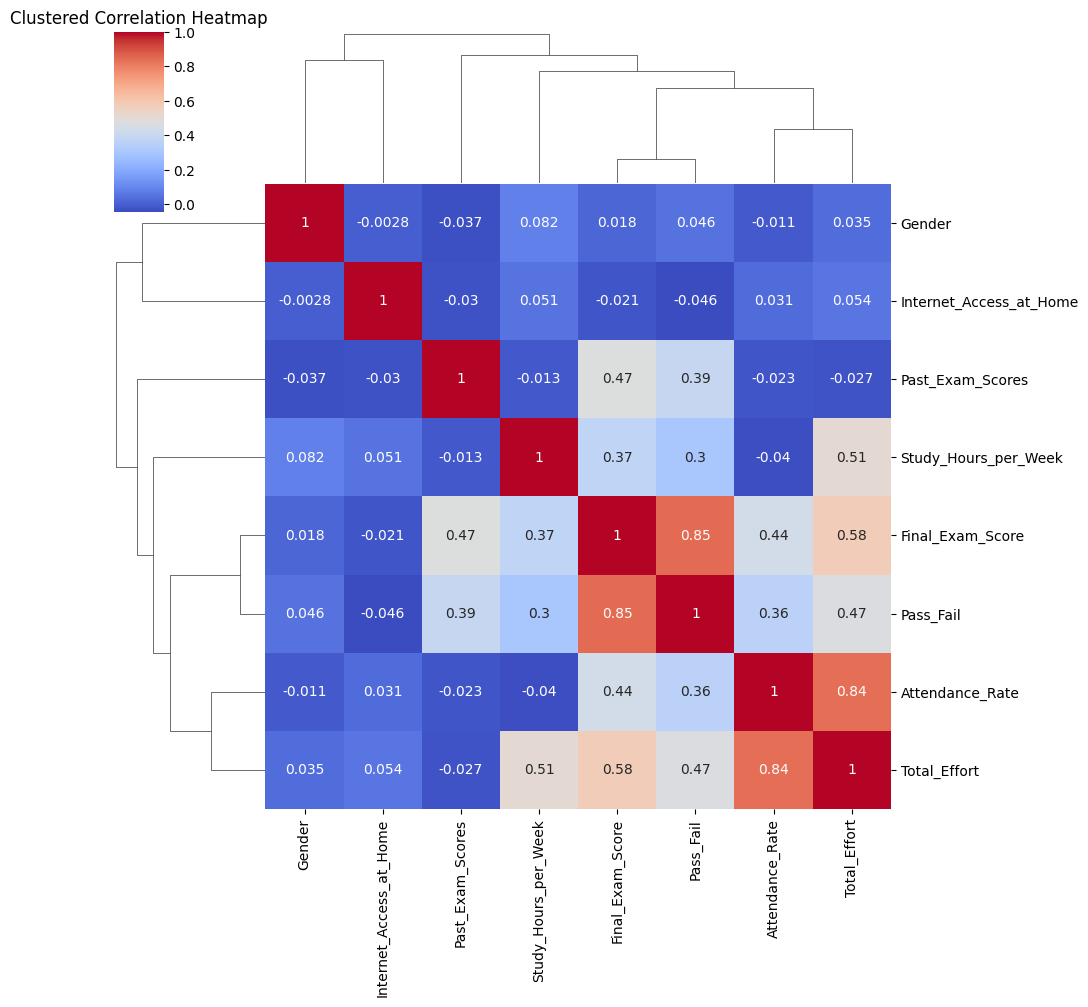

In [54]:
sns.clustermap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Clustered Correlation Heatmap")
plt.show()


## Insight Generation and Report


1. Study hours have a positive impact on final exam scores, as students who
study more tend to perform better.

2. Higher attendance rates are associated with improved academic performance.

3. Gender-wise analysis shows minimal difference in performance between male
and female students.

4. Students with higher parental education background generally score better
in examinations.

5. Internet access at home provides a slight advantage in student performance.

6. Pass–fail analysis indicates that the majority of students have successfully
cleared the examination.
